In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats

,Unnamed: 0,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
0,0,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
1,1,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
2,2,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
3,3,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
4,4,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,6,29,25.0,49.2,14,8,11,25,8,34,0.0,50.8,9,10,15,29,3
9497,9497,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
9498,9498,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
9499,9499,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7


In [4]:
correlations = game_stats[game_stats.columns[1:]].corr()['totalGoals'][:]
lr_weights = np.array([c for c in correlations if c < 1.00])

<AxesSubplot:>

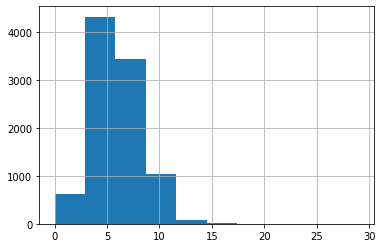

In [5]:
plt.figure()
game_stats["totalGoals"].hist()

<AxesSubplot:>

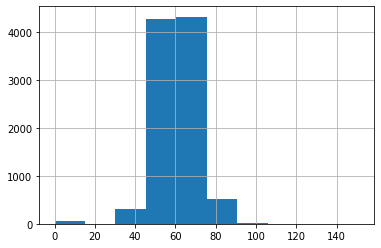

In [6]:
(game_stats["home_shots"] + game_stats["away_shots"]).hist()

<AxesSubplot:>

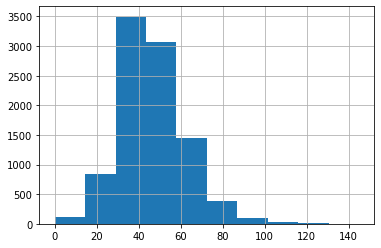

In [7]:
(game_stats["home_hits"] + game_stats["away_hits"]).hist()

In [8]:
game_stats["totalHits"] = (game_stats["home_hits"] + game_stats["away_hits"])


<AxesSubplot:>

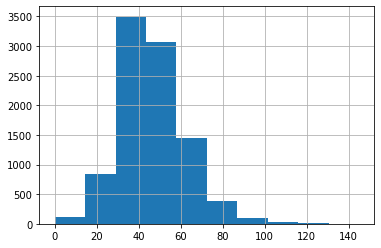

In [9]:
game_stats["totalHits"].hist()

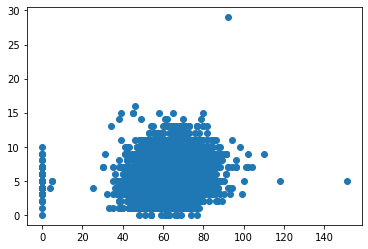

In [10]:
game_stats["totalShots"] = game_stats["home_shots"] + game_stats["away_shots"]
plt.scatter(game_stats["totalShots"], game_stats["totalGoals"])

In [11]:
correlations = np.array(game_stats[game_stats.columns[1:]].corr()['totalGoals'][:])
correlations

array([ 0.08949497,  0.13011655,  0.27449957,  0.00613371, -0.05228897,
        0.03785528,  0.02259474, -0.05819319,  0.09065126,  0.1306554 ,
        0.25492709,  0.00430434, -0.06177959,  0.03822497,  0.0288119 ,
       -0.04682741,  1.        , -0.05992652,  0.18264848])